# Jak zaoszczędzić  na mieszkanie w 5 lat?

Obliczamy ile warte będzie za 5 lat mieszkanie, które obecnie kosztuje 120 tys.przy założeniu inflacji rocznej 5%:

In [211]:
import numpy as np
import numpy_financial as npf

rate1=0.05
rate2=0.12
years=5
pv = -120000
nper=60
periods = np.arange(1,nper+1,dtype=int)


fv = np.around(npf.fv(rate1/12,nper,0,pv),2)
print(fv)

154003.04


Tak z miesiąca na miesiąc będzie rosła wartość mieszkania:

In [212]:
inflation_fv=np.around(npf.ipmt(rate1/12,periods,nper,pv,fv),2)
cum_fv=np.cumsum(inflation_fv)[:60]
future_value= -pv +cum_fv
print(future_value)

[120500.   121002.08 121506.26 122012.54 122520.93 123031.43 123544.06
 124058.83 124575.74 125094.81 125616.04 126139.44 126665.02 127192.79
 127722.76 128254.94 128789.34 129325.96 129864.82 130405.92 130949.28
 131494.9  132042.8  132592.98 133145.45 133700.22 134257.3  134816.71
 135378.45 135942.53 136508.96 137077.75 137648.91 138222.45 138798.38
 139376.71 139957.45 140540.61 141126.2  141714.23 142304.71 142897.65
 143493.06 144090.95 144691.33 145294.21 145899.6  146507.51 147117.96
 147730.95 148346.5  148964.61 149585.3  150208.57 150834.44 151462.92
 152094.02 152727.74 153364.11 154003.13]


Jeśli co miesiąc będziesz wpłacać stałą kwotę to przy 12% rocznie oprocentowanej lokacie uda Ci się zarobić następującą kwotę odsetek:

In [213]:
payment= np.around(npf.ipmt(rate2/12, periods,nper,0, future_value),2)
payments = np.sum(payment)
print (payments)

37926.13


Twoja comiesięczna wpłata przez 5 lat powinna wynosić:

In [214]:
installment = np.around((fv - payments)/60,2)
print(installment)

1934.62


Twoje oszczędności w banku będą z miesiąca na miesiąc przyrastały w następujący sposób:

In [215]:
full_payment = np.add(installment, payment)
cum_full_payment=np.cumsum(full_payment)
print(cum_full_payment)


[  1934.62   3884.06   5848.58   7828.47   9824.    11835.46  13863.14
  15907.34  17968.35  20046.47  22142.01  24255.28  26386.6   28536.29
  30704.67  32892.08  35098.85  37325.32  39571.84  41838.76  44126.43
  46435.22  48765.49  51117.62  53491.99  55888.98  58308.97  60752.37
  63219.57  65710.99  68227.03  70768.12  73334.68  75927.14  78545.94
  81191.53  83864.36  86564.89  89293.58  92050.9   94837.34  97653.38
 100499.51 103376.23 106284.06 109223.51 112195.1  115199.36 118236.83
 121308.06 124413.6  127554.02 130729.89 133941.79 137190.3  140476.03
 143799.58 147161.56 150562.6  154003.33]


Na wykresie przyrost wartości mieszkania oraz wartości lokaty wygląda następująco:

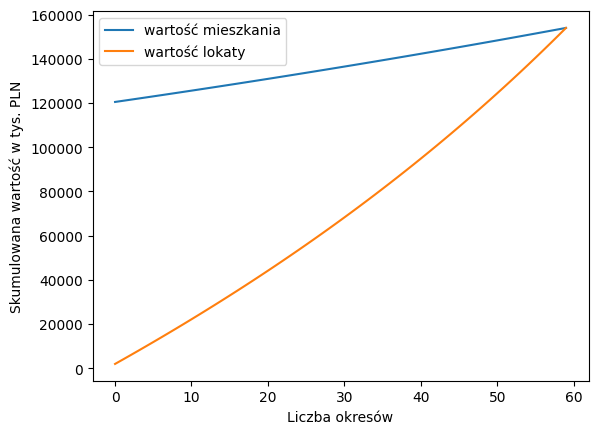

In [216]:
import matplotlib.pyplot as plt

y1=plt.plot(future_value,label='wartość mieszkania')
y2=plt.plot(cum_full_payment, label='wartość lokaty')
plt.legend()
plt.xlabel('Liczba okresów')
plt.ylabel('Skumulowana wartość w tys. PLN')
plt.yscale('linear')
plt.show()